### Sierpinski Pentagon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [30]:
def GetPolygonPoints(center, radius, n=3):
    points = []
    ang = 90
    step = 360/n
    for i in range(n):
        x = center[0] + radius*np.cos(ang*np.pi/180)
        y = center[1] + radius*np.sin(ang*np.pi/180)
        points.append([x,y])
        ang += step
#         print(x,y,ang, end="\n")
    return points

def SPentagons(center, radius, depth, polygons=[]):
    if depth == 0:
        points = GetPolygonPoints(center, radius, 3)
        polygons.append(Polygon(points, True))
    else:
        scale = 1/(2 + 2*np.cos(72*np.pi/180))
        r = scale*radius
        d = radius - r
        centers = GetPolygonPoints(center, d, 3)
        for center in centers:
            SPentagons(center,r, depth-1, polygons)
    

GetPolygonPoints([3,3], 2)
        

[[3.0, 5.0],
 [1.2679491924311228, 1.9999999999999998],
 [4.7320508075688767, 1.9999999999999991]]

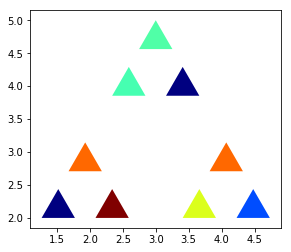

In [38]:
%matplotlib inline
fig,ax = plt.subplots()
patches = []
SPentagons([3,3],2,2,patches)
collection = PatchCollection(patches, cmap=cm.jet)
colors = 100*np.random.rand(len(patches))
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.set_xlim(0,6)  # Set the limit of the x axis
ax.set_ylim(0,6)  # Set the limit of the y axis
plt.axis('scaled')
plt.show()

### Pandas

In [39]:
import pandas as pd

In [40]:
data = pd.read_csv("WHO.csv")

In [41]:
data.describe()

,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
count,1.940000e+02,194.000000,194.000000,183.000000,194.000000,194.000000,184.000000,103.000000,162.000000,101.000000,101.000000
mean,3.635997e+04,28.732423,11.163660,2.940656,70.010309,36.148969,93.641522,83.710680,13320.925926,90.850495,89.632673
std,1.379031e+05,10.534573,7.149331,1.480984,9.259075,37.992935,41.400447,17.530645,15192.988650,11.017147,12.817614
min,1.000000e+00,13.120000,0.810000,1.260000,47.000000,2.200000,2.570000,31.100000,340.000000,37.200000,32.500000
25%,1.695750e+03,18.717500,5.200000,1.835000,64.000000,8.425000,63.567500,71.600000,2335.000000,87.700000,87.300000
50%,7.790000e+03,28.650000,8.530000,2.400000,72.500000,18.600000,97.745000,91.800000,7870.000000,94.700000,95.100000
75%,2.453525e+04,37.752500,16.687500,3.905000,76.000000,55.975000,120.805000,97.850000,17557.500000,98.100000,97.900000
max,1.390000e+06,49.990000,31.920000,7.580000,83.000000,181.600000,196.410000,99.800000,86440.000000,100.000000,100.000000


In [10]:
data.head(5)

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [11]:
data.count()

Country                          194
Region                           194
Population                       194
Under15                          194
Over60                           194
FertilityRate                    183
LifeExpectancy                   194
ChildMortality                   194
CellularSubscribers              184
LiteracyRate                     103
GNI                              162
PrimarySchoolEnrollmentMale      101
PrimarySchoolEnrollmentFemale    101
dtype: int64

In [46]:
# lit = data.LiteracyRate
lowest = data[data.LiteracyRate == data.LiteracyRate.max()]
print(data.LiteracyRate.max()) # Mininum literacy value
print(lowest.Country)

99.8
43       Cuba
57    Estonia
93     Latvia
Name: Country, dtype: object


In [33]:
result = data[data.Country == "United States of America"]
result.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
185,United States of America,Americas,318000,19.63,19.31,2.0,79,7.1,92.72,NaN,48820.0,95.4,96.1


In [39]:
result = data[data.Region == "Americas"].Population.sum()
print(result)

957769


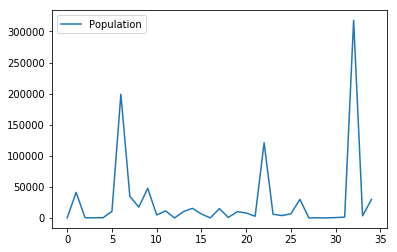

In [43]:
result = data[data.Region == "Americas"][["Country","Population"]]
result.plot(use_index=False)